In [1]:
plt.style.use("ggplot")

In [2]:
df_train = pd.read_csv("../../data/train.csv")
df_test = pd.read_csv("../../data/test.csv")

In [3]:
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [4]:
y = np.array(df_train["SalePrice"])[np.newaxis]
y

array([[208500, 181500, 223500, ..., 266500, 142125, 147500]], dtype=int64)

In [5]:
x = np.ones([len(df_train), 1])
x = np.hstack((x, np.array(df_train["LotFrontage"])[np.newaxis].T))
x

array([[  1.,  65.],
       [  1.,  80.],
       [  1.,  68.],
       ..., 
       [  1.,  66.],
       [  1.,  68.],
       [  1.,  75.]])

In [16]:
def LinearReg(data, target, *features):
    y = np.array(data[target])[np.newaxis].T
    
    X = np.ones([len(data), 1])
    for feature in features:
        X = np.hstack((X, np.array(data[feature])[np.newaxis].T))
    
    w, resid, rank, s = np.linalg.lstsq(X, y)
    
    for i in range(len(w)):
        print("w{} : {}".format(i, w[i]), end = " ")
    print("\n resident : {}".format(resid[0]))
    print("rank : {}".format(rank))
    
    # draw chart
    # 예측치와 실제치과의 관계표시(scatter plot)
    predict = np.dot(X, w)
    
    plt.scatter(y, predict)
    plt.xlabel("target value")
    plt.ylabel("predict value")
    plt.xlim(data[target].min(), data[target].max())
    plt.ylim(data[target].min(), data[target].max())
    plt.show()

w0 : [-104702.66244802] w1 : [ 44328.48617063] w2 : [ 1.45010022] 
 resident : 3144737217224.9746
rank : 3


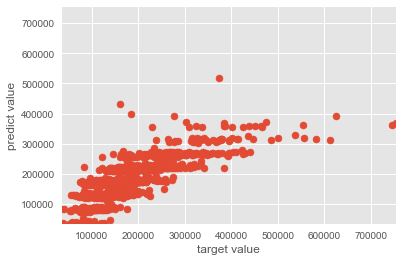

In [20]:
LinearReg(df_train, "SalePrice", "OverallQual", "LotArea", "")